# **1. Perkenalan Dataset**


**Sumber Dataset**: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Dataset Telco Customer Churn adalah kumpulan data yang dirancang untuk menganalisis perilaku pelanggan pada sebuah perusahaan telekomunikasi. Dataset ini berfokus pada prediksi apakah pelanggan akan berhenti berlangganan (churn) atau tetap bertahan.

Dataset ini mencakup atribut-atribut penting sebagai berikut:
- Demografi: Gender, SeniorCitizen, Partner, Dependents.
- Layanan: PhoneService, MultipleLines, InternetService, OnlineSecurity, dll.
- Akun: Contract, PaperlessBilling, PaymentMethod.
- Tagihan: MonthlyCharges, TotalCharges.
- Target: Churn (Yes/No).

Dataset ini sangat berguna bagi peneliti data dan praktisi bisnis untuk memahami faktor utama penyebab hilangnya pelanggan (customer attrition) serta merancang strategi retensi pelanggan yang lebih efektif melalui pendekatan Machine Learning.

# **2. Import Library**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [45]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
df.head()

Jumlah Baris: 7043
Jumlah Kolom: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


/tmp/ipython-input-1956500178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


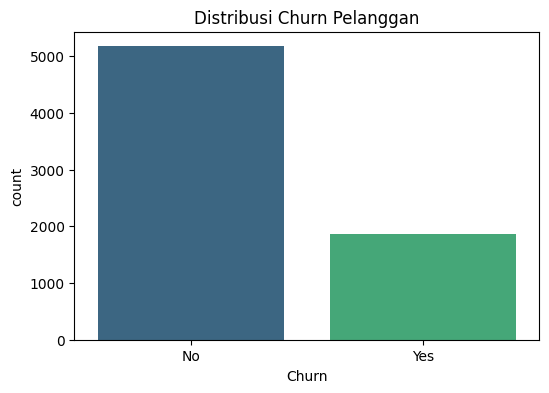

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title("Distribusi Churn Pelanggan")
plt.xticks(rotation=0)
plt.show()

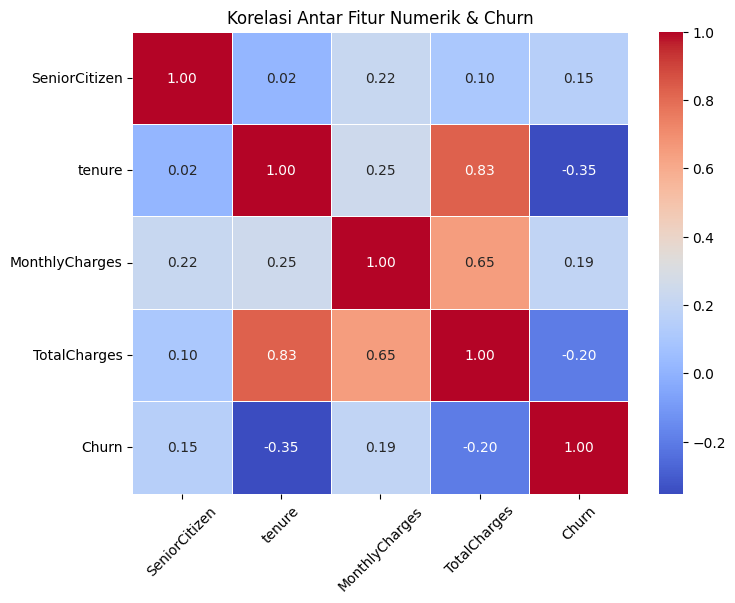

In [49]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].map({'Yes': 1, 'No': 0})
df_corr = df_temp.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik & Churn")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

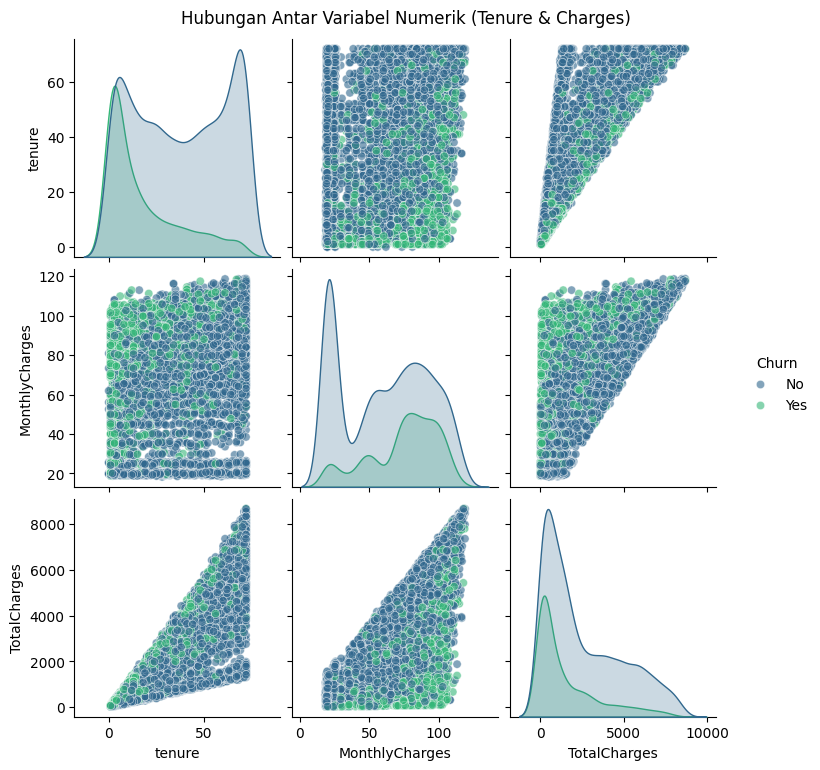

In [50]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

sns.pairplot(df,
             vars=['tenure', 'MonthlyCharges', 'TotalCharges'],
             hue='Churn',
             palette='viridis',
             plot_kws={'alpha': 0.6})

plt.suptitle("Hubungan Antar Variabel Numerik (Tenure & Charges)", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [51]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
print("Jumlah Missing Values setelah cleaning:")
print(df.isnull().sum())

Jumlah Missing Values setelah cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-799566578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [53]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [54]:
def detect_outliers_iqr(data):
    data = data.dropna()
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].index.tolist()
    return outliers

outliers_tenure = detect_outliers_iqr(df['tenure'])
outliers_monthly = detect_outliers_iqr(df['MonthlyCharges'])
outliers_total = detect_outliers_iqr(df['TotalCharges'])
all_outliers = list(set(outliers_tenure + outliers_monthly + outliers_total))

print(f"Jumlah outlier: {len(all_outliers)}")

Jumlah outlier: 0


In [55]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, drop_first=True)

In [56]:
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nDimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)


Dimensi X_train: (5634, 30)
Dimensi X_test: (1409, 30)
